In [1]:
import torch
from torch import Tensor
from torch import nn
import matplotlib.pyplot as plt

In [23]:
weight = 0.7
bias = 0.3

start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [24]:
y = weight * X + bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [25]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]

In [26]:
X_test, y_test = X[train_split:], y[train_split:]

In [27]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None
):
    plt.style.use('ggplot')
    plt.figure(figsize=(8, 5))
    plt.scatter(train_data, train_labels, c='b', s=18, label='Training data', marker='^', edgecolors='b')

    plt.scatter(test_data, test_labels, c='g', s=18, label='Testing data', marker='s', edgecolors='g')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=18, label='Predictions', marker='o', edgecolors='w')

    plt.grid(True, linestyle=':')
    plt.legend(prop={'size': 14})
    plt.show()

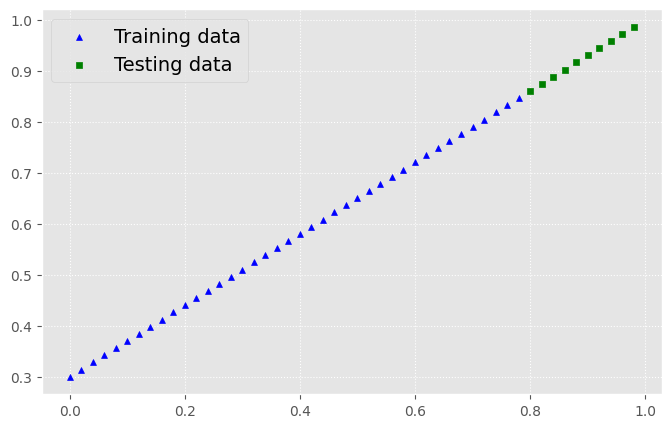

In [28]:
plot_predictions()

### Build Model

In [29]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: Tensor) -> Tensor:
        return self.weights * x + self.bias

In [30]:
SEED = 42
torch.manual_seed(SEED)

In [31]:
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [32]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
# Fazendo predições usando torch.inference_mode()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [34]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [35]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

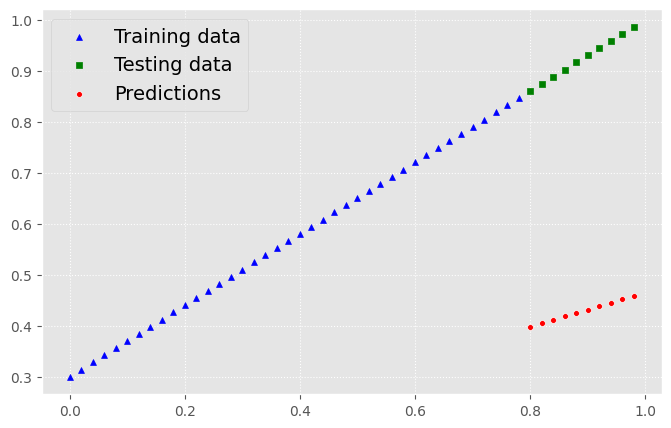

In [36]:
plot_predictions(predictions=y_preds)

In [37]:
from functools import wraps

def inference_mode(func):
    @wraps(func)
    def wrap(*args, **kwargs):
        with torch.inference_mode():
            return func(*args, **kwargs)
    return wrap

In [38]:
# learning rate
lr = 0.01
# loss function
loss_fn = nn.L1Loss()
# optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=lr)

### training
1. Percorra pelos dados
2. `forward propagation`passe pelo modelo
3. Calcule a `Loss`
4. Optimizer `zero_grad` zere os gradientes
5. Loss `backpropagation`
6. Optmizer `step` (`gradient descent`)

OBS: `epoch` uma época é um loop completo pelos seus dados de treinamento

Epoch: 0 | Test: 0.024458957836031914 | Test loss: 0.05646304413676262


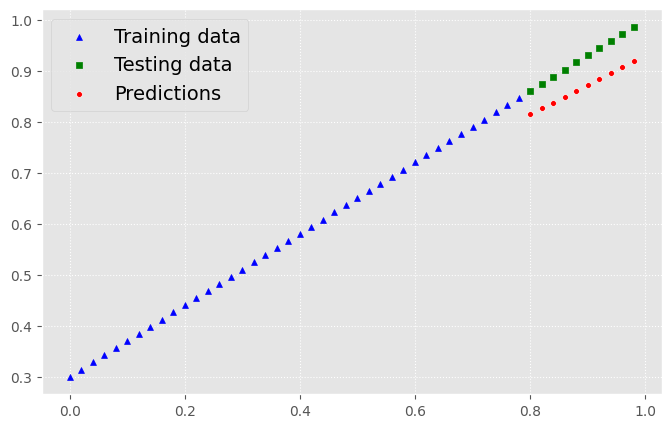

Epoch: 10 | Test: 0.021020207554101944 | Test loss: 0.04819049686193466


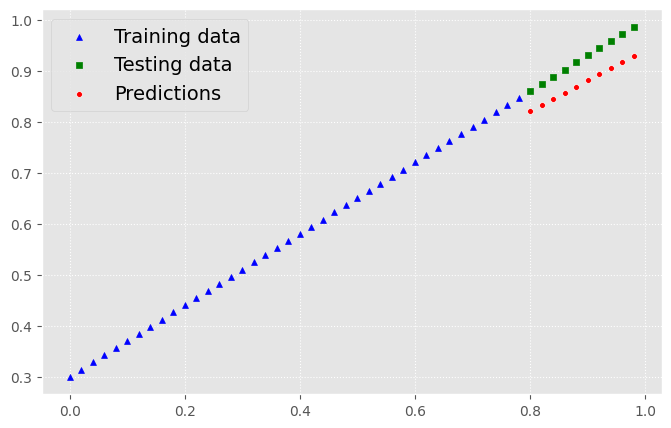

Epoch: 20 | Test: 0.01758546568453312 | Test loss: 0.04060482233762741


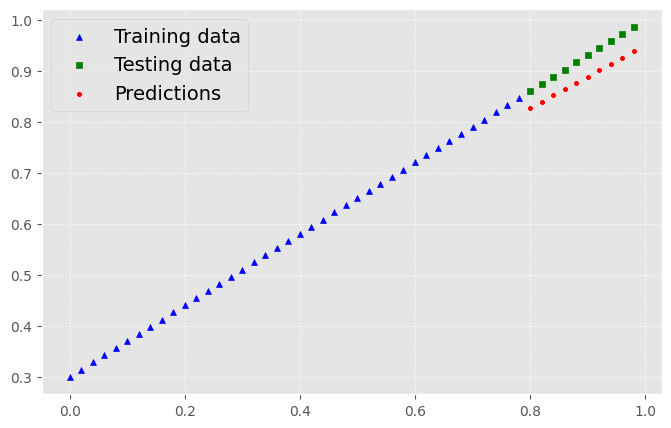

Epoch: 30 | Test: 0.014155393466353416 | Test loss: 0.03233227878808975


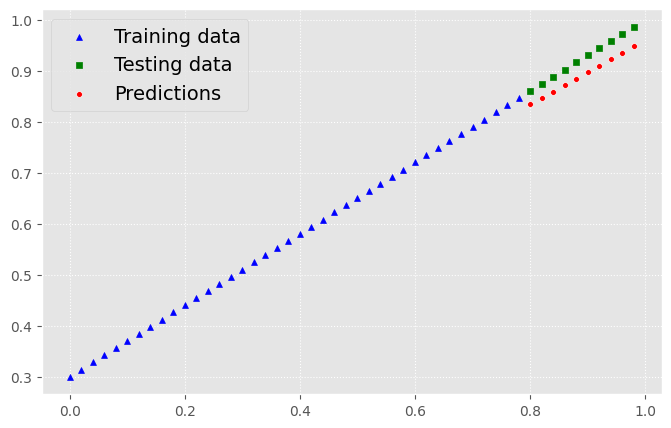

Epoch: 40 | Test: 0.010716589167714119 | Test loss: 0.024059748277068138


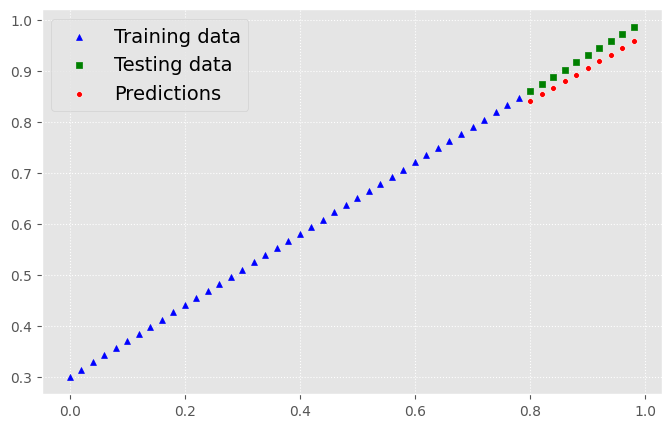

Epoch: 50 | Test: 0.0072835334576666355 | Test loss: 0.016474086791276932


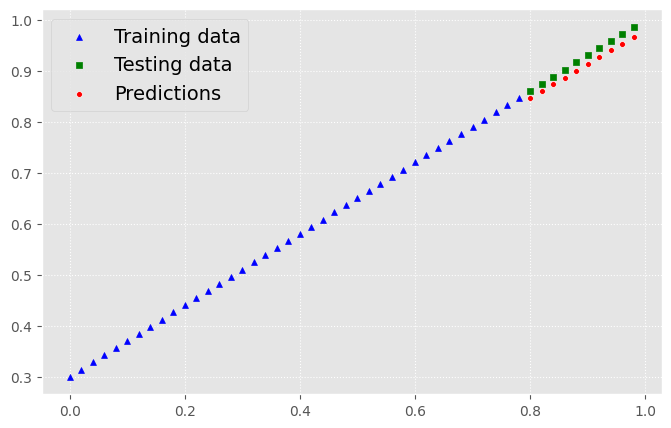

Epoch: 60 | Test: 0.0038517764769494534 | Test loss: 0.008201557211577892


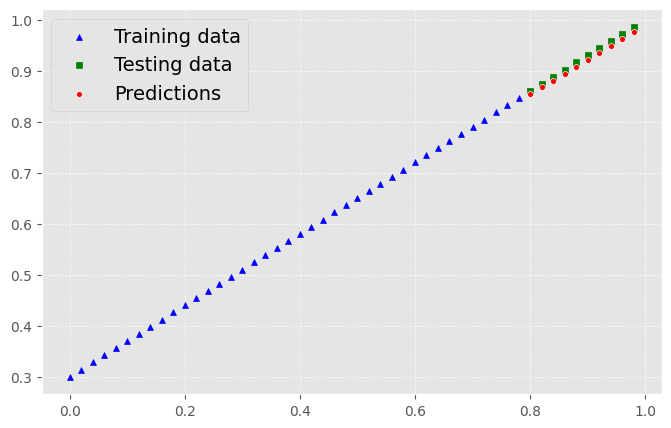

Epoch: 70 | Test: 0.008932482451200485 | Test loss: 0.005023092031478882


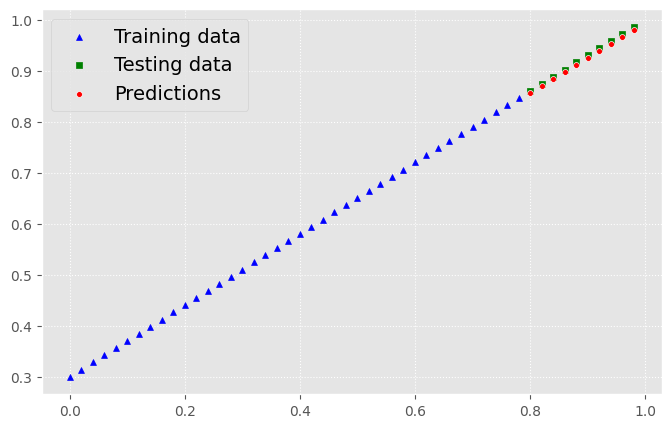

Epoch: 80 | Test: 0.008932482451200485 | Test loss: 0.005023092031478882


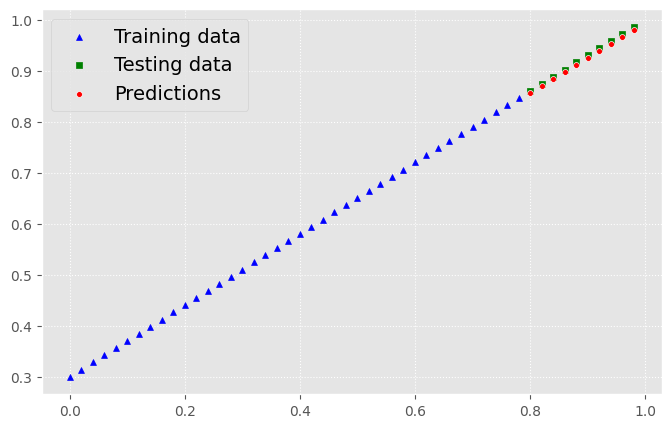

Epoch: 90 | Test: 0.008932482451200485 | Test loss: 0.005023092031478882


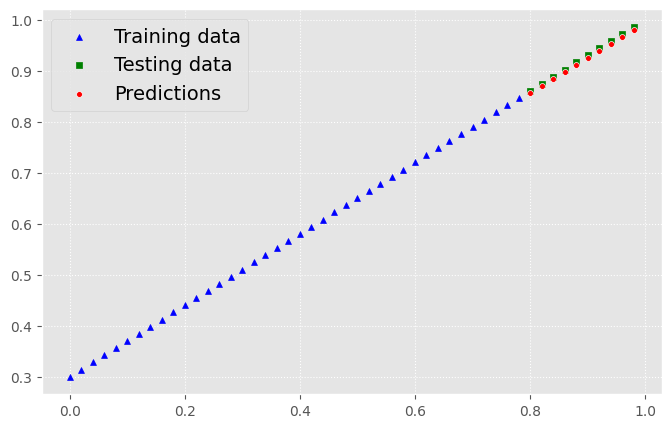

In [40]:
EPOCHS = 100
for epoch in range(EPOCHS):
    model_0.train()
    # forward
    y_pred = model_0(X_train)
    # loss
    loss = loss_fn(y_pred, y_train)
    # optimizer
    optimizer.zero_grad()
    # backpropagation
    loss.backward()
    # gradient descent
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0: 
        print(f'Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}')
        # print(model_0.state_dict())
        plot_predictions(predictions=test_pred)

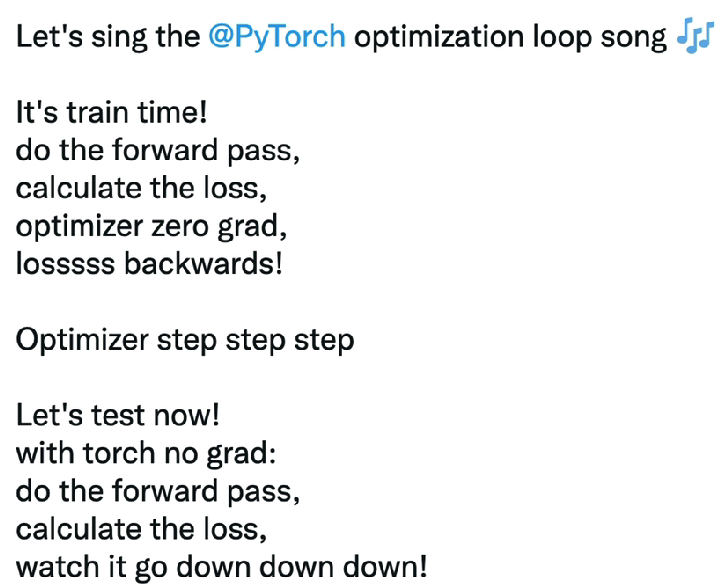

### Save model

In [42]:
from pathlib import Path

In [43]:
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '0_pytorch_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

In [45]:
# salvando o modelo
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

### Carregando o modelo

In [46]:
loaded_model_0 = LinearRegressionModel()

In [47]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [48]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [49]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])